In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures

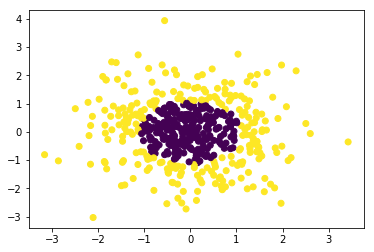

In [3]:
# 生成2维正态分布,生成的数据按分位数分为两类
# 可以生成两类或多类数据
x_data, y_data = make_gaussian_quantiles(n_samples=500, n_features=2,n_classes=2)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [4]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

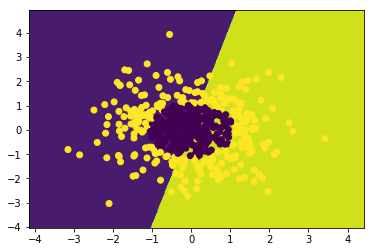

score: 0.536


In [12]:
# 获取数据集所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# np.r_按row来组合array,
# np.c_按column来组合array
# >>> import numpy as np
# >>> a = np.array([1,2,3])
# >>> b = np.array([5,2,5])
# >>> np.r_[a,b]
# array([1, 2, 3, 5, 2, 5])
# >>> np.c_[a,b]
# array([[1, 5],
#        [2, 2],
#        [3, 5]])
# >>> np.c_[a,[0,0,0],b]
# array([[1, 0, 5],
#        [2, 0, 2],
#        [3, 0, 5]])

z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
for i in range(len(z)):
    if z[i] > 0.5:
        z[i] = 1
    else:
        z[i] = 0
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)
#样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_data,y_data))

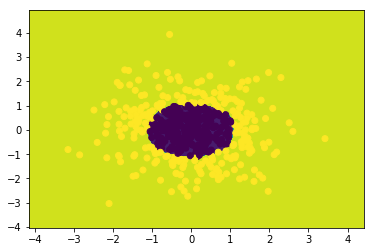

score: 0.994


In [19]:
# 定义多项式回归,degree的值可以调节多项式的特征
poly_reg = PolynomialFeatures(degree=5)
# 特征处理
x_poly = poly_reg.fit_transform(x_data)
logistic = linear_model.LogisticRegression()
# 训练模型
logistic.fit(x_poly, y_data)

# 获取数据集所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# np.r_按row来组合array,
# np.c_按column来组合array
# >>> import numpy as np
# >>> a = np.array([1,2,3])
# >>> b = np.array([5,2,5])
# >>> np.r_[a,b]
# array([1, 2, 3, 5, 2, 5])
# >>> np.c_[a,b]
# array([[1, 5],
#        [2, 2],
#        [3, 5]])
# >>> np.c_[a,[0,0,0],b]
# array([[1, 0, 5],
#        [2, 0, 2],
#        [3, 0, 5]])

z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)
#样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_poly, y_data))